In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

## Question 61 4-連結数

connect_sample.png を4-連結数により、色分けせよ。

4-連結数とは近傍との画素の状態を見る値である。 通常、近傍は注目画素x0(x,y)が0でない場合に対して、次のように定義される。

* x4(x-1,y-1) x3(x,y-1) x2(x+1,y-1)
* x5(x-1,y) x0(x,y) x1(x+1,y)
* x6(x-1,y+1) x7(x,y+1) x8(x+1,y+1)
ここで4連結数とは、次式で計算される。

||||
|---|---|---|
|x4|x3|x2|
|x5|x0|x1|
|x6|x7|x8|


* S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1)

S = [0,4]の範囲をとり、

* S = 0 は内部点（8近傍のすべてが0、あるいはすべてが1の場合; 4近傍のすべてが0の場合）
* S = 1 は端点
* S = 2 は連結点
* S = 3 は分岐点
* S = 4 は交差点（4近傍がすべて0、かつ4隅がすべて1の場合）

を示す。

In [28]:
def connect_4(img):
    h, w = img.shape
    
    tmp = np.zeros((h, w), dtype=int)
    
    tmp[img > 0] = 1
    
    out = np.zeros((h, w, 3), dtype=np.uint8)
    
    for y in range(h):
        for x in range(w):
            if tmp[y, x] == 0:
                continue
            
            x1 = tmp[y, min(x+1, w-1)]
            x2 = tmp[max(y-1, 0), min(x+1, w-1)]
            x3 = tmp[max(y-1, 0), x]
            x4 = tmp[max(y-1, 0), max(x-1, 0)]
            x5 = tmp[y, max(x-1, 0)]
            x6 = tmp[min(y+1, h-1), max(x-1, 0)]
            x7 = tmp[min(y+1, h-1), x]
            x8 = tmp[min(y+1, h-1), min(x+1, w-1)]
            
            S = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1)
            
            if S == 0:
                out[y, x] = [0, 0, 255]
            elif S == 1:
                out[y, x] = [0, 255, 0]
            elif S == 2:
                out[y, x] = [255, 0, 0]
            elif S == 3:
                out[y, x] = [255, 255, 0]
            elif S == 4:
                out[y, x] = [255, 0, 255]
            
    out = out.astype(np.uint8)
    return out

In [29]:
img_connect = io.imread("https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/connect_sample.png?raw=true")

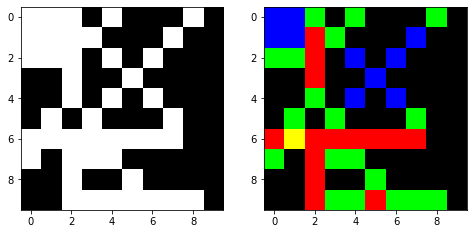

In [30]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_connect, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(connect_4(img_connect))

## Question 62 8-連結数

connect_sample.pngを8-連結数により、色分けせよ。

8連結数とは

S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1)

において各xの値の0と1を反転させた値を用いる。

In [26]:
def connect_8(img):
    h, w = img.shape
    
    tmp = np.zeros((h, w), dtype=int)
    tmp[img > 0] = 1
    tmp = 1 - tmp
    
    out = np.zeros((h, w, 3), dtype=np.uint8)
    
    for y in range(h):
        for x in range(w):
            if tmp[y, x] == 1:
                continue
            
            x1 = tmp[y, min(x+1, w-1)]
            x2 = tmp[max(y-1, 0), min(x+1, w-1)]
            x3 = tmp[max(y-1, 0), x]
            x4 = tmp[max(y-1, 0), max(x-1, 0)]
            x5 = tmp[y, max(x-1, 0)]
            x6 = tmp[min(y+1, h-1), max(x-1, 0)]
            x7 = tmp[min(y+1, h-1), x]
            x8 = tmp[min(y+1, h-1), min(x+1, w-1)]
            
            S = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1)
            
            if S == 0:
                out[y, x] = [0, 0, 255]
            elif S == 1:
                out[y, x] = [0, 255, 0]
            elif S == 2:
                out[y, x] = [255, 0, 0]
            elif S == 3:
                out[y, x] = [255, 255, 0]
            elif S == 4:
                out[y, x] = [255, 0, 255]
            
    out = out.astype(np.uint8)
    return out

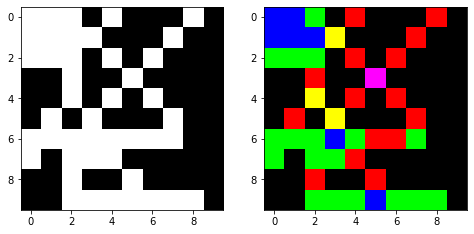

In [27]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_connect, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(connect_8(img_connect))

## Question 63 細線化処理

gazo_sample.png を細線化せよ。

> 細線化とは、2値化された画像を対象に行われ、白（黒）画素の領域（図形）をその中心の1画素からなる線分に収縮させる操作で、微分画像を2値化してエッジ検出を行う際などに行われる。また、細い帯状の図形では機会設計図などを除けば、その線幅に含まれる情報よりその図形の中心線の位置や形に含まれる情報（端点、分岐点など）が重要になる場合が多い。細線化を行うには、次の点が考慮されねばならない。
>
> - 線幅：細線化されたときの線幅は1であること
> - 位置：線の位置はもとの図形の中心にあること
> - 連続性：もとの図形の連続性（トポロジカルな性質）を保存すること
> - 安定性：端点を削りすぎないこと
> - 耐雑音性：図形周辺部の小さなギザギザ（形状雑音）に影響されないこと
>
> 細線化処理の基本は、上記の五つの条件を満たしながら図形の周辺の画素を順に削って図形の中心に1画素からなる連なりを残すことである。すなわち、着目図形（領域）の境界上の着目画素にそれと同種類の画素がどのように連結しているか、連結数をもとに着目画素がどのような状態（端点、連続点、分岐点、交差点など）にあるかを判断し消去可能なら消去し（図形から背景へ変換）、消去できる画素がなくなるまでこの操作をくり返す。

細線化とは画素の幅を1にする処理であり、ここでは次のアルゴリズムに沿って処理を行え。

左上からラスタスキャンする。 x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の3条件を満たす時にx0=0に変える。

* 注目画素の4近傍に0が一つ以上存在する（境界線上にある）
* x0の4-連結数が1である（端点でない）
* x0の8近傍に1が3つ以上存在する（連結性が保存される）

1回のラスタスキャンで2の変更数が0になるまで、ラスタスキャンを繰り返す。

細線化にはヒルディッチのアルゴリズム(Q.64)や、Zhang-Suenのアルゴリズム(Q.65)、田村のアルゴリズムなどが存在する。

In [11]:
gazo = io.imread("https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/gazo_sample.png?raw=true")

In [17]:
def thinning(img):
    h, w = img.shape
    
    out = np.zeros((h, w), dtype=int)
    out[img > 0] = 1
    
    count = 1
    while count > 0:
        count = 0
        tmp = out.copy()
        
        for y in range(h):
            for x in range(w):
                if out[y, x] == 0:
                    continue

                condition = 0

                x1 = tmp[y, min(x+1, w-1)]
                x2 = tmp[max(y-1, 0), min(x+1, w-1)]
                x3 = tmp[max(y-1, 0), x]
                x4 = tmp[max(y-1, 0), max(x-1, 0)]
                x5 = tmp[y, max(x-1, 0)]
                x6 = tmp[min(y+1, h-1), max(x-1, 0)]
                x7 = tmp[min(y+1, h-1), x]
                x8 = tmp[min(y+1, h-1), min(x+1, w-1)]

                ## condition 1
                if x1 + x3 + x5 + x7 < 4:
                    condition += 1

                ## condition 2
                connect_4 = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1)
                if connect_4 == 1:
                    condition += 1
                
                ## condition 3
                if x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 >= 3:
                    condition += 1
                
                ## if conditions all satisfied
                if condition == 3:
                    out[y, x] = 0
                    count += 1
                
    out = out.astype(np.uint8)
    return out

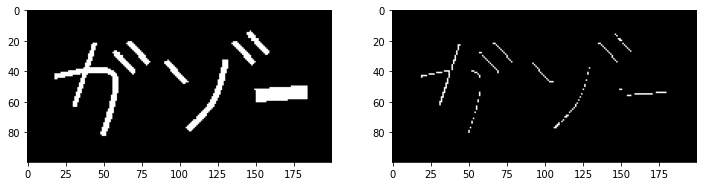

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(gazo, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(thinning(gazo), cmap="gray")

## Quesiton 64 ヒルディッチの細線化



gazo_sample.png にヒルディッチの細線化を行え。

アルゴリズムは、次の通り。

1. 左上からラスタスキャンする。
2. x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の5条件を満たす時にx0=-1に変える。
    - 注目画素の4近傍に0が一つ以上存在する
    - x0の8-連結数が1である
    - x1〜x8の絶対値の合計が2以上
    - x0の8近傍に1が1つ以上存在する
    - xn(n=1〜8)全てに対して以下のどちらかが成り立つ -- xnが-1以外 -- xnを0とした時、x0の8-連結数が1である
3. 各画素の-1を0に変える
4. 一回のラスタスキャンで3の変更数が0になるまで、ラスタスキャンを繰り返す。

In [20]:
# def hilditch_thinning(img):
#     h, w = img.shape
    
#     out = np.zeros((h, w), dtype=int)
#     out[img > 0] = 1
    
#     count = 1
#     while count > 0:
#         count = 0
#         tmp = out.copy()
#         _tmp = 1 - tmp
        
#         for y in range(h):
#             for x in range(w):
#                 if out[y, x] < 1:
#                     continue
                    
#                 condition = 0
                
#                 x1 = tmp[y, min(x+1, w-1)]
#                 x2 = tmp[max(y-1, 0), min(x+1, w-1)]
#                 x3 = tmp[max(y-1, 0), x]
#                 x4 = tmp[max(y-1, 0), max(x-1, 0)]
#                 x5 = tmp[y, max(x-1, 0)]
#                 x6 = tmp[min(y+1, h-1), max(x-1, 0)]
#                 x7 = tmp[min(y+1, h-1), x]
#                 x8 = tmp[min(y+1, h-1), min(x+1, w-1)]
                                    
#                 _x1 = _tmp[y, min(x+1, w-1)]
#                 _x2 = _tmp[max(y-1, 0), min(x+1, w-1)]
#                 _x3 = _tmp[max(y-1, 0), x]
#                 _x4 = _tmp[max(y-1, 0), max(x-1, 0)]
#                 _x5 = _tmp[y, max(x-1, 0)]
#                 _x6 = _tmp[min(y+1, h-1), max(x-1, 0)]
#                 _x7 = _tmp[min(y+1, h-1), x]
#                 _x8 = _tmp[min(y+1, h-1), min(x+1, w-1)]
                
#                 o_x1 = _tmp[y, min(x+1, w-1)]
#                 o_x2 = _tmp[max(y-1, 0), min(x+1, w-1)]
#                 o_x3 = _tmp[max(y-1, 0), x]
#                 o_x4 = _tmp[max(y-1, 0), max(x-1, 0)]
#                 o_x5 = _tmp[y, max(x-1, 0)]
#                 o_x6 = _tmp[min(y+1, h-1), max(x-1, 0)]
#                 o_x7 = _tmp[min(y+1, h-1), x]
#                 o_x8 = _tmp[min(y+1, h-1), min(x+1, w-1)]
                
#                 ## condition 1
#                 if x1 + x3 + x5 + x7 < 4:
#                     condition += 1
                    
#                 ## condition 2 境界点である
#                 connect_8 = (_x1 - _x1 * _x2 * _x3) + (_x3 - _x3 * _x4 * _x5) + (_x5 - _x5 * _x6 * _x7) + (_x7 - _x7 * _x8 * _x1)
#                 if connect_8 == 1:
#                     condition += 1
                
#                 ## condition 3 端点の保存
#                 if x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 >= 2:
#                     condition += 1
                
#                 ## condition 4
#                 if o_x1 + o_x2 + o_x3 + o_x4 + o_x5 + o_x6 + o_x7 + o_x8 >= 1:
#                     condition += 1

#                 ## condition 5
#                 _tmp2 = 1 - out